In [46]:
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from math import *

# Pendulum Experiment







In [189]:
string = "21.9	22.1	22.2 25.4	25.32	25.7 28.6	28.64	28.68 31.11	31.15	31.07 33.47	33.42	33.49 35.92	35.84	35.89".replace(" ", ",").replace("\t", ",")

In [190]:
data = np.array([float(sub) for sub in string.split(',')])
data = data.reshape((6, 3))

In [191]:
results = np.zeros((3, 6))
for i in range(3):
    results[i] += np.take(data, i, axis=1)
results= results.T

In [192]:
results

array([[21.9 , 22.1 , 22.2 ],
       [25.4 , 25.32, 25.7 ],
       [28.6 , 28.64, 28.68],
       [31.11, 31.15, 31.07],
       [33.47, 33.42, 33.49],
       [35.92, 35.84, 35.89]])

In [193]:
averages = np.zeros(6)
for i in range(6):
    averages[i] = np.average(np.take(results, i, 0))

In [194]:
print("Averages")
tuple(print(round(num, 5)) for num in averages)
print("\nPeriod")
tuple(print(round(num/20, 5)) for num in averages)
print("\nPeriod squared")
tuple(print(round((num/20)**2, 5)) for num in averages)


Averages
22.06667
25.47333
28.64
31.11
33.46
35.88333

Period
1.10333
1.27367
1.432
1.5555
1.673
1.79417

Period squared
1.21734
1.62223
2.05062
2.41958
2.79893
3.21903


(None, None, None, None, None, None)

In [294]:
frame = DataFrame(results, columns=("t1","t2","t3"))
lengths = [30, 40, 50, 60, 70, 80]

vecf = np.vectorize(lambda t : round(t, 2))
frame["Average"] = vecf(averages)
frame["Period"] = vecf(averages/20)
frame["Lengths"] = lengths
frame["Period Squared"] = vecf((averages/20) ** 2)

In [295]:
frame

,t1,t2,t3,Average,Period,Lengths,Period Squared
0,21.90,22.10,22.20,22.07,1.10,30,1.22
1,25.40,25.32,25.70,25.47,1.27,40,1.62
2,28.60,28.64,28.68,28.64,1.43,50,2.05
3,31.11,31.15,31.07,31.11,1.56,60,2.42
4,33.47,33.42,33.49,33.46,1.67,70,2.80
5,35.92,35.84,35.89,35.88,1.79,80,3.22


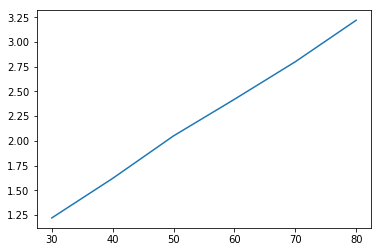

In [297]:
plt.plot(frame["Lengths"], frame["Period Squared"])

In [314]:
slope = np.polyfit(frame["Lengths"], frame["Period Squared"], 1)
slope

array([0.03974286, 0.03580952])

In [311]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(frame["Lengths"].values.reshape(-1, 1), frame["Period Squared"].values.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [313]:
model.coef_

array([[0.03974286]])

# Lenses Experiment 







In [220]:
s = np.array((15,20,25,30,35)) * 10 ** -2
sp = np.array((25.5,19.5,16.5,15.1,14.2)) * 10 ** -2
print(s, sp)

[0.15 0.2  0.25 0.3  0.35] [0.255 0.195 0.165 0.151 0.142]


In [223]:
for num in s:
    print(round(1/num, 5))

6.66667
5.0
4.0
3.33333
2.85714


In [224]:
for num in sp:
    print(round(1/num, 5))

3.92157
5.12821
6.06061
6.62252
7.04225


In [225]:
for num in 1/sp+1/s:
    print(round(num, 5))

10.58824
10.12821
10.06061
9.95585
9.8994


In [227]:
for num in 1/sp+1/s:
    print(round(1/num, 5))

0.09444
0.09873
0.0994
0.10044
0.10102


In [202]:
f = 1/(1/sp+1/s)

In [203]:
f

array([ 9.44444444,  9.87341772,  9.93975904, 10.0443459 , 10.10162602])

In [204]:
fav = np.average(f)*10**-2

In [205]:
fav

0.09880718623274522

In [186]:
1/(fav)

10.120721357700143

In [209]:
s = s * 10 ** -2
sp = sp * 10 ** -2

In [219]:
for i in s:
    print(round(1/i, 5))

6.66667
5.0
4.0
3.33333
2.85714


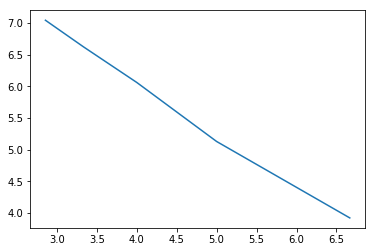

In [228]:
plt.plot(1/s, 1/sp)

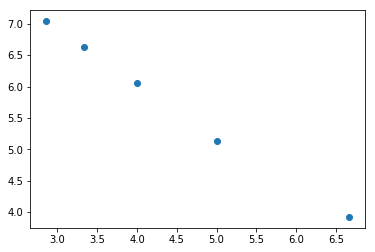

In [229]:
plt.scatter(1/s, 1/sp)

# Meter bridge

In [3]:
L1 = np.array([85.7,63.66,50,40.65,35.35])
L2 = np.array([14.3,36.34,50,59.35,64.65])
Rb = np.array([0.2,0.6,1,1.4,1.8])
D = 0.7 * 10 ** -3

In [6]:
Rx = L1/L2 * Rb

In [8]:
[print(round(x, 5)) for x in Rx]

1.1986
1.05107
1.0
0.95889
0.98422


[None, None, None, None, None]

In [14]:
rx = np.average(Rx)

In [16]:
rx

1.0385570573642182

In [26]:
Area = rx * (D/2) ** 2 / 1.13

In [27]:
round(Area, 15)

1.12586938e-07

In [28]:
1.12586938e-07

1.12586938e-07

# Rydberg constant

In [34]:
n = np.array([3, 4, 5])
d = np.array([4.4, 3.2, 2.9]) * 10 ** -2
L = 0.1
a = 1.62 * 10 ** -6

In [38]:
for i in 1/(n*n):
    print(round(i, 5))

0.11111
0.0625
0.04


In [44]:
for i in d/L:
    print(i)

0.44
0.32
0.29


In [63]:
for i in d/L:
    print(round(degrees(atan(i)), 5))

23.74949
17.74467
16.17216


In [56]:
arr = []
for i in d/L:
    arr.append(atan(i) * 57.2958)
β = np.array(arr)

In [64]:
λ = a * np.array([sin(radians(b)) for b in β])

In [69]:
[print(round(l, 10)) for l in λ]

6.524e-07
4.937e-07
4.512e-07


[None, None, None]

In [74]:
[print(round(l, 6)) for l in 1/λ]

1532715.564938
2025370.402253
2216264.084703


[None, None, None]

In [77]:
Rh = 1/λ * (4*n**2/(n**2-4))

In [81]:
[print(round(rh, 5)) for rh in Rh]

11035552.06755
10801975.47868
10553638.49859


[None, None, None]

In [82]:
np.average(Rh)

10797055.348273503

In [ ]:
10797055.348273503
